- ID: id único del registro (Entero).
- Región: región de la oportunidad (Categórica).
- Territory: territorio comercial de la oportunidad (Categórica).
- Pricing, Delivery_Terms_Quote_Approval: variable que denomina si la oportunidad necesita aprobación especial de su precio total y los términos de la entrega (Binaria).
- Pricing, Delivery_Terms_Approved: variable que denomina si la oportunidad obtuvo aprobación especial de su precio total y los términos de la entrega (Binaria).
- Bureaucratic_Code_0_Approval: variable que denomina si la oportunidad necesita el código burocrático 0 (Binaria).
- Bureaucratic_Code_0_Approved: variable que denomina si la oportunidad obtuvo el código burocrático 0 (Binaria).
- Submitted_for_Approval: variable que denomina si fue entregada la oportunidad para la aprobación (Binaria).
- Bureaucratic_Code: códigos burocráticos que obtuvo la oportunidad (Categórica).
- Account_Created_Date: fecha de creación de la cuenta del cliente (Datetime).
- Source: fuente de creación de la oportunidad (Categórica).
- Billing_Country: país donde se emite la factura (Categórica).
- Account_Name: nombre de la cuenta del cliente (Categórica).
- Opportunity_Name: nombre de la oportunidad (Categórica).
- Opportunity_ID: id de la oportunidad (Entero).
- Sales_Contract_No: número de contrato (Entero).
- Account_Owner: vendedor del equipo comercial responsable de la cuenta cliente (Categórica).
- Opportunity_Owner: vendedor del equipo comercial responsable de la oportunidad comercial (Categórica).
- Account_Type: tipo de cuenta cliente (Categórica).
- Opportunity_Type: tipo de oportunidad (Categórica).
- Quote_Type: tipo de presupuesto (Categórica).
- Delivery_Terms: términos de entrega (Categórica).
- Opportunity_Created_Date: fecha de creación de la oportunidad comercial (Datetime).
- Brand: marca del producto (Categórica).
- Product_Type: tipo de producto (Categórica).
- Size: tamaño del producto (Categórica).
- Product_Category_B: categoría 'B' del producto (Categórica).
- Price: precio (Decimal).
- Currency: moneda (Categórica).
- Last_Activity: fecha de la última actividad (Datetime).
- Quote_Expiry_Date: fecha de vencimiento del presupuesto (Datetime).
- Last_Modified_Date: fecha de ultima modificación en la oportunidad (Datetime).
- Last_Modified_By: usuario responsable de la última modificación en la oportunidad (Categórica).
- Product_Family: familia de producto (Categórica).
- Product_Name: nombre del producto (Categórica).
- ASP_Currency: moneda del precio promedio (Categórica).
- ASP: (Average Selling Price) precio promedio a la venta (Decimal).
- ASP_(converted)_Currency: moneda del precio promedio convertido en la variable (Categórica)
- ASP_(converted): precio promedio a la venta convertido a otra moneda (Decimal).
- Planned_Delivery_Start_Date: límite inferior del rango previsto para la fecha de entrega (Datetime).
- Planned_Delivery_End_Date: límite superior del rango previsto para la fecha de entrega (Datetime).
- Month: mes-año de Planned_Delivery_Start_Date (Fecha).
- Delivery_Quarter: trimestre de Planned_Delivery_Start_Date (Categorica).
- Delivery_Year: año de Planned_Delivery_Start_Date (Fecha).
- Actual_Delivery_Date: fecha real de la entrega (Datetime).
- Total_Power: potencia del producto (Entero).
- Total_Amount_Currency: moneda del monto total (Decimal).
- Total_Amount: monto total (Decimal).
- Total_Taxable_Amount_Currency: moneda del monto gravado total (Categórica).
- Total_Taxable_Amount: monto gravado total (Categórica).
- Stage: variable target. Estado de la oportunidad (Categórica).
- Prod_Category_A: categoría 'A' del producto (Categórica).
- Total_Power_Discreet: categorización de la variable Total Power en bins (Categórica).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import matplotlib
plt.style.use('default')

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format 

import warnings
warnings.filterwarnings('ignore')


In [8]:
entrenamiento = pd.read_csv('Entrenamieto_ECI_2020.csv')
entrenamiento.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,"5,272,800.00",EUR,"5,272,800.00",Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,"48,230.00",EUR,"48,230.00",Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,"83,865.60",USD,"83,865.60",Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,"7,421,881.50",USD,"7,421,881.50",Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,"13,357,192.50",USD,"13,357,192.50",Closed Lost,Prod_Category_A_None


In [11]:
# Actual_Delivery_Date y Last_Activity son nulas
entrenamiento['Actual_Delivery_Date'].value_counts()

NaT    16947
Name: Actual_Delivery_Date, dtype: int64

In [12]:
def convertirATiempo(df,lista):
    for columna in lista:
        df[columna] = pd.to_datetime(entrenamiento[columna])
    return df

def establecerTipos(df):
    listaDeColumnasFechas = ['Account_Created_Date','Opportunity_Created_Date','Last_Activity','Quote_Expiry_Date','Last_Modified_Date','Delivery_Year','Actual_Delivery_Date','Planned_Delivery_End_Date','Planned_Delivery_Start_Date']
    df = convertirATiempo(df,listaDeColumnasFechas)
    return df
    
establecerTipos(entrenamiento)
entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int64         
 1   Region                              16947 non-null  object        
 2   Territory                           16947 non-null  object        
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64         
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64         
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64         
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64         
 7   Submitted_for_Approval              16947 non-null  int64         
 8   Bureaucratic_Code                   16947 non-null  object        
 9   Account_Created_Date                16947 non-null  datetime64[ns]
 10  Source                

In [13]:
cantidadStage = entrenamiento['Stage'].value_counts()
cantidadStage

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

In [14]:
def cantidadDeStage(csv,cerrados,proporcion=False):
    cantidadStage = csv['Stage'].value_counts()
    if (cerrados):
        filtro = ['Closed Won','Closed Lost']
    else:
        filtro = ['Negotiation','Proposal','Qualification']
    cantidadStageFiltrado = cantidadStage.filter(items=filtro)
    if (proporcion):
        cantidadStageFiltrado = cantidadStageFiltrado / cantidadStageFiltrado.sum()
    return cantidadStageFiltrado

In [15]:
print("Stage Cerrados cantidad\n")
print(cantidadDeStage(entrenamiento,True))
print("\n")
print("Stage Cerrados proporcion\n")
print(cantidadDeStage(entrenamiento,True,True))
print("\n")
print("Stage no Cerrados cantidad\n")
print(cantidadDeStage(entrenamiento,False))
print("\n")
print("Stage no Cerrados proporcion\n")
print(cantidadDeStage(entrenamiento,False,True))

Stage Cerrados cantidad

Closed Won     9533
Closed Lost    7350
Name: Stage, dtype: int64


Stage Cerrados proporcion

Closed Won                    0.56
Closed Lost                   0.44
Name: Stage, dtype: float64


Stage no Cerrados cantidad

Negotiation      18
Proposal         35
Qualification    11
Name: Stage, dtype: int64


Stage no Cerrados proporcion

Negotiation                     0.28
Proposal                        0.55
Qualification                   0.17
Name: Stage, dtype: float64


In [17]:
entrenamiento['Closed'] = entrenamiento['Stage'].replace({'Closed Won': 1, 'Closed Lost': 1, 'Negotiation':0,'Proposal':0,'Qualification':0})
entrenamiento['Closed'].value_counts()

1    16883
0       64
Name: Closed, dtype: int64

In [39]:
def cantidadDeTipoDeStagePorTiempo(df,tiempo,descripcion,tamaniosDeLetra=(15,20),cerrado=True):
    data = df[['Closed',tiempo]]
    data = data.dropna(how='any',axis=0) 
    data['mes'] = data[tiempo].agg(lambda x: x.month)
    data['anio'] = data[tiempo].agg(lambda x: x.year)
    afirmacion = ""
    if (not cerrado):
        afirmacion = " no"
        data['Closed'] = (data['Closed'] - 1) * (-1)
    data = pd.pivot_table(data,index='anio',columns='mes',values='Closed', aggfunc='sum')
    grafico = sns.heatmap(data, annot=False)
    grafico.set_title("Cantidad" + afirmacion +" cerrados de " + descripcion, fontsize= tamaniosDeLetra[1])
    grafico.set_xlabel("Mes de " + descripcion, fontsize= tamaniosDeLetra[0])
    grafico.set_ylabel("Año de " + descripcion, fontsize= tamaniosDeLetra[0])
    return grafico

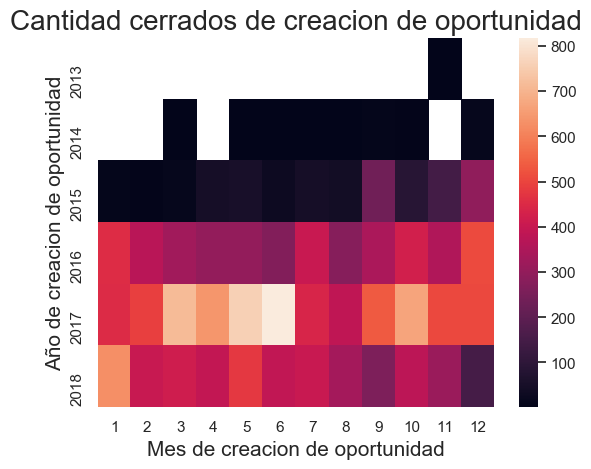

In [40]:
cantidadDeTipoDeStagePorTiempo(entrenamiento,'Opportunity_Created_Date',"creacion de oportunidad")

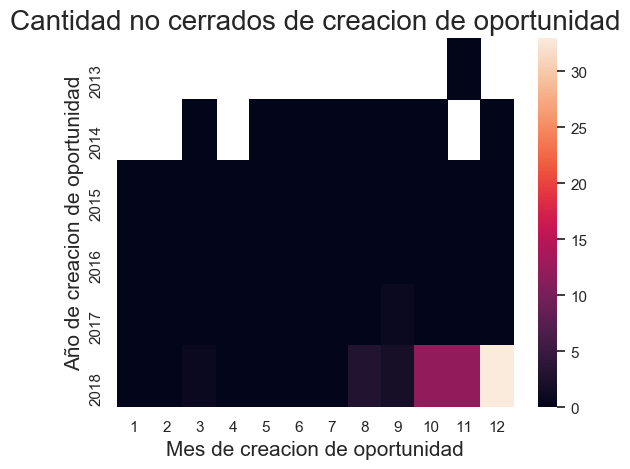

In [41]:
cantidadDeTipoDeStagePorTiempo(entrenamiento,'Opportunity_Created_Date',"creacion de oportunidad",cerrado=False)